# Geostatistics -1
author: Sathyanarayan Rao

date: 5/18/2018

reference: http://people.ku.edu/~gbohling/cpe940/Variograms.pdf

## Experimental Variogram

$$\gamma(h) = \frac{1}{2N(h)} \sum_{N(h)}(z_i-z_j)^2$$


1. Experimental variogram $\gamma(h)$ is a function describing the spatial dissimilarity of the data, where h is the seperation distance between two samples $z_i$ and  $z_j$. 

2. Low $\gamma(h)$ indicates high spatial similarity between $z_i$ and  $z_j$ whereas high $\gamma(h)$ indicates low spatial similarity between $z_i$ and  $z_j$. 

3. The separation distance (h) at which $\gamma(h)$ stops increasing is called range.

4. $\gamma(h)$ at range is called sill

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib  import cm
%matplotlib inline

In [2]:
def experimental_variogram(data,lag,bandwidth):
    # Experimental Variogram for a single lag
    N = len(data);   # length of data
    distance_matrix = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            distance_matrix[i,j] = (np.sqrt((data[i,0]-data[j,0])**2+(data[i,1]-data[j,1])**2)) # seperation distance in matrix form
    sum2   = np.array(np.where(( distance_matrix >= lag-bandwidth )&( distance_matrix <= lag+bandwidth )))
    V      = np.mean((data[sum2[0,:],2] - data[sum2[1,:],2] )**2.0)/2
    return(V)

Lets have some test data to calculate variogram:


| sample | X | Y | Z |
|---| --- | --- | --- |
|1| 0.4 | 0.84 | 1 |
|2| 0.48 | 0.48 | 0.25 |
|3| 0.56 | 0.78 | 1 |
|4| 0.12 | 0.5 | 0.2 |
|5| 0.83 | 0.375 | 0.1 |
|6| 0.85 | 0.75 | 0.05 |
|7| 0.64 | 0.57 | 0.6 |
|8| 0.53 | 0.25 | 0 |
|9| 0.1 | 0.2 | 0 |
|10| 0.8 | 0.1 | 0.05 |
|11| 0.125| 0.825 | 0 |
|12| 0.825| 0.6 | 0 |
|13| 0.7| 0.125 | 0 |
|14| 0.6| 0.76 | 1|
|15| 0.125| 0.05 | 0 |
|16| 0.24 | 0.78 | 0.05 |
|17| 0.8 | 0.3 | 0.8 |
|18| 0.27 | 0.38 | 0.7 |
|19| 0.1 | 0.375 | 0 |
|20| 0.75 | 0.625 | 0.2 |
|21| 0.73 | 0.38 | 0.8 |
|22| 0.6 | 0.375 | 0 |
|23| 0.3 | 0.25 | 1 |
|24| 0.47 | 0.625 | 1 |
|25| 0.125 | 0.6 | 0.8 |
|26| 0.49 | 0.1 |0 |
|27| 0.72 | 0.3 |0 |
|28| 0.75 | 0.9 |0 |
|29| 0.9 | 0.9 |0 |
|30| 0.3 | 0.03 |0 |
|31| 0.25 | 0.74 | 0.9 |
|32| 0.33 | 0.51 | 0.8 |
|33| 0.87 | 0.7 | 0 |
|34| 0.5 | 0.37 | 0 |
|35| 0.48 | 0.4 | 0.7 |
|36| 0.77 | 0.77 |0.8 |
|37| 0.74 | 0.74 |0.8 |
|38| 0.8 | 0.42 |0 |
|39| 0.62 | 0.2 |0 |
|40| 0.26 | 0.825 |0 |





In [3]:
# create data vector
data      = np.array([]);
x = np.array((0.4,0.48,0.56,0.12,0.83,0.85,0.64,0.53,0.1,0.8,0.125,0.825,0.7,0.6,0.125,0.24,0.8,0.27,0.1,0.75,0.73,0.6,0.3,0.47,0.125,0.49,0.72,0.75,0.9,0.3,0.25,0.33,0.87,0.5,0.48,0.77,0.74,0.8,0.62,0.26));
y = np.array((0.84,0.48,0.78,0.5,0.375,0.75,0.57,0.25,0.2,0.1,0.825,0.6,0.125,0.76,0.05,0.78,0.3,0.38,0.375,0.625,0.38,0.375,0.25,0.625,0.6,0.1,0.3,0.9,0.9,0.03,0.74,0.51,0.7,0.37,0.4,0.77,0.74,0.42,0.2,0.825));
z = np.array((1,0.25,1,0.2,0.1,0.05,0.6,0,0,0.05,0,0,0,1,0,0.05,0.8,0.7,0,0.2,0.8,0,1,1,0.8,0,0,0,0,0,0.9,0.8,0,0,0.7,0.8,0.8,0,0,0));
data = np.column_stack((x,y,z));
print(np.shape(data))

(40, 3)


In [4]:
# define bandwidth and other parameters for variogram
bw   = (np.max(x)-np.min(x))/10;
lags = np.array((0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.8));
V    = list();
for i in range(len(lags)):
    V.append(experimental_variogram(data,lags[i],bw))
    
print(lags)    

[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.8 ]


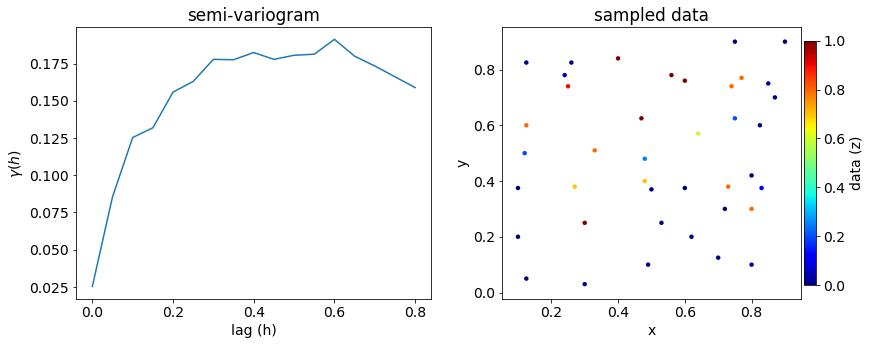

In [5]:
mpl.rcParams.update({'font.size': 14})
fig,ax  =  plt.subplots(figsize = (14,5),nrows =1,ncols=2)  
  
ax[0].plot(lags,V) 
ax[0].set_xlabel('lag (h)')
ax[0].set_ylabel('$\gamma (h)$')
ax[0].set_title('semi-variogram')

colors = z
sc   = ax[1].scatter(x,y,s=20,c=colors, marker = 'o', cmap = cm.jet,edgecolors='none');
cbar = plt.colorbar(sc, shrink=0.9, pad = 0.01)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('sampled data')
cbar.set_label('data (z)')